# Business Problem

This project empowers apple growers, distributors, and retailers to efficiently assess the quality of apples using machine learning. By predicting apple quality based on measurable attributes, this project streamlines operations, reduces waste, and enhances customer satisfaction throughout the supply chain, ultimately revolutionizing the apple industry.

# Data Understanding:
This dataset contains information about various attributes of a set of fruits, providing insights into their characteristics. The dataset includes details such as fruit ID, size, weight, sweetness, crunchiness, juiciness, ripeness, acidity, and quality.

The dataset was generously provided by an American agriculture company. The data has been scaled and cleaned for ease of use.

[Apple Quality: Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality)

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import zipfile

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [14]:
with zipfile.ZipFile("data.zip", "r") as zip_ref:
    zip_ref.extractall("data")

# Read the extracted CSV file into a DataFrame
data = pd.read_csv("data/apple_quality.csv")

# Display the first few rows of the DataFrame
print(data.head())

   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good  


# Data Preperation

It looks like the features in our database have been standardized and normalized -- (likely because it's difficult to create a scale for subjective 'scores' such as sweetness and juiciness) this is very helpful.

Let's continue with the rest of our data preparation steps:

- Handling Missing Values
- Encoding Categorical Variables
- Feature Scaling
- Feature Selection / Engineering

In [39]:
num_rows, num_columns = data.shape
print(f"number of rows: {num_rows}")    # need > 1000
print(f"number of cols: {num_columns}") # need ~10

print()
null_counts = data.isnull().sum()
print("Number of rows after dropping null values:", null_counts)

print()
clean_data = data.dropna()

# Print the number of rows in the cleaned dataset
num_rows_cleaned = len(clean_data)
print("Number of rows after dropping null values:", num_rows_cleaned)

number of rows: 4001
number of cols: 9

Number of rows after dropping null values: A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

Number of rows after dropping null values: 4000


In [40]:
clean_data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


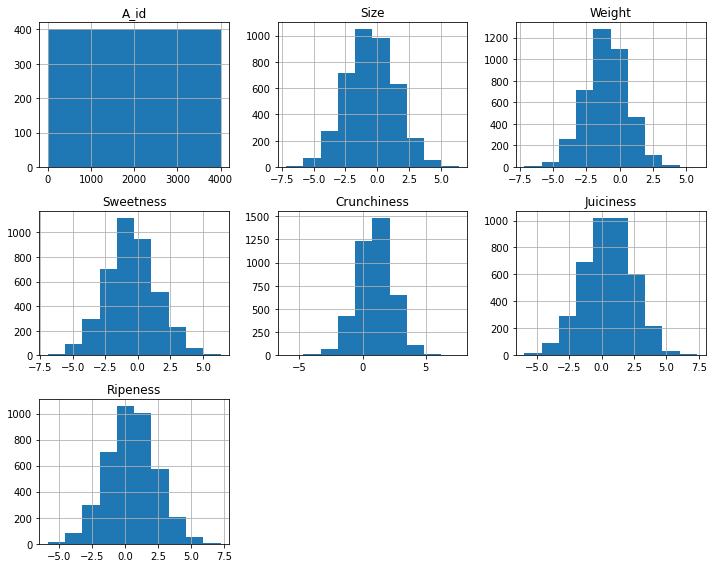

In [41]:
# check distribution of features
clean_data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [42]:
# Encoding Categorical Variables
le = LabelEncoder()

# suppress SettingWithCopyWarning using '.loc[:,' 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
clean_data.loc[:, 'Quality'] = le.fit_transform(clean_data['Quality'])

In [44]:
# Feature Scaling
scaler = StandardScaler()

# Select the numerical columns to be scaled
numerical_columns = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

# Fit and transform the numerical columns
clean_data.loc[:, numerical_columns] = scaler.fit_transform(clean_data[numerical_columns])

In [45]:
clean_data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-1.798424,-0.950373,2.993421,-1.424150,0.690545,-0.089872,-0.269415,1
1,1.0,-0.359060,-1.154404,2.127698,0.429746,0.176767,0.197020,-0.378997,1
2,2.0,0.109445,-0.225759,-0.652507,-0.946892,1.205422,-0.286156,1.206044,0
3,3.0,-0.079977,-0.800146,0.923916,-0.772399,1.619575,-2.087320,0.338315,1
4,4.0,0.968573,-0.191640,0.044164,-1.096894,1.305025,-0.961548,0.201472,1


In [48]:
# Feature Engineering
target_feature = 'Quality'

# Create correlation matrix
correlation_matrix = clean_data.corr()

# Extract the correlation values between features and the target feature
feature_correlations = correlation_matrix[target_feature].sort_values(ascending=False)

# Print the feature correlations
print("Correlation between features and the target feature:")
print(feature_correlations)

Correlation between features and the target feature:
Quality        1.000000
Juiciness      0.260223
Sweetness      0.250998
Size           0.244007
A_id           0.004875
Weight         0.001421
Acidity       -0.007697
Crunchiness   -0.012376
Ripeness      -0.264315
Name: Quality, dtype: float64


With this, we can interpret:
- juiciness, sweetness, and size of the apple have a weak positive correlation to quality
- ripeness has a weak negative correlation
- the others have a very weak or negligible correlations with quality. 

Based on these results, we will focus on features like juiciness, sweetness, size, and ripeness for analysis, as they have relatively stronger correlations with the target feature 'Quality'.

# Modeling

### Baseline Model: 
Majority Class Classifier Accuracy: 0.501
Baseline Classification Report:

|              | precision | recall | f1-score | support |
|--------------|-----------|--------|----------|---------|
| 0            | 1.00      | 0.00   | 0.00     | 1996    |
| 1            | 0.50      | 1.00   | 0.67     | 2004    |
| accuracy     |           |        | 0.50     | 4000    |
| macro avg    | 0.75      | 0.50   | 0.33     | 4000    |
| weighted avg | 0.75      | 0.50   | 0.33     | 4000    |

Accuracy score of 0.501 is not particularly impressive,as it suggests that the classifier is only slightly better than random guessing.

The Majority Class Classifier's performance is not satisfactory.

In [55]:
# Separate the features (X) and the target variable (y)
X = clean_data.drop('Quality', axis=1)
y = clean_data['Quality']

# Convert the target variable to a known data type (e.g., integers)
y = y.astype(int)

# Get the majority class
majority_class = y.mode()[0]

# Create a majority class classifier
majority_class_predictions = [majority_class] * len(y)

# Evaluate the majority class classifier
accuracy_majority = accuracy_score(y, majority_class_predictions)
print("Majority Class Classifier Accuracy:", accuracy_majority)

# Print the classification report for the majority class classifier
print("Majority Class Classifier Classification Report:")

# zero_division to suppress UndefinedMetricWarning
print(classification_report(y, majority_class_predictions, zero_division=1)) 

Majority Class Classifier Accuracy: 0.501
Majority Class Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1996
           1       0.50      1.00      0.67      2004

    accuracy                           0.50      4000
   macro avg       0.75      0.50      0.33      4000
weighted avg       0.75      0.50      0.33      4000

